<a href="https://colab.research.google.com/github/ramiro-l/ModelosYSimulacionFAMAF/blob/main/Parcial3-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJ 2

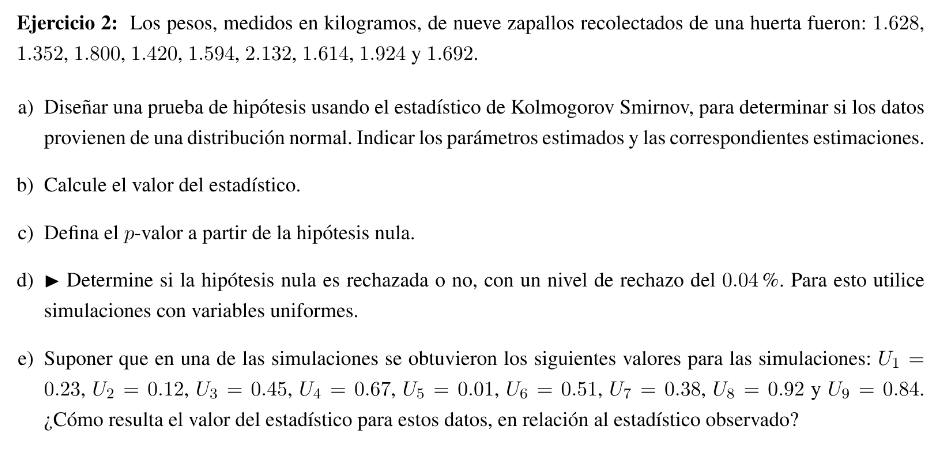

## a)

$$
H_0 = \text{los datos provienen de una distribucion normal con μ y σ desconocidos}
$$

Para ello vamos a estimar los parametros correspondientes con la media muestral y al desviación estandar muestral.

In [40]:
import math

MUESTRA_EJ2 = [1.628, 1.352, 1.800, 1.420, 1.594, 2.132, 1.614, 1.924, 1.692]

def estimacion_parametros_normal(muestra):
    mu = sum(muestra)/len(muestra)
    sigma = math.sqrt(sum((x-mu)**2 for x in muestra)/(len(muestra)-1))
    return mu, sigma

estimacion_mu, estimacion_sigma = estimacion_parametros_normal(MUESTRA_EJ2)
print(f"Estimacion de la media:             {estimacion_mu:.8f}")
print(f"Estimacion del desviacion estandar: {estimacion_sigma:.8f}")

Estimacion de la media:             1.68400000
Estimacion del desviacion estandar: 0.24183672


## b)

In [41]:
import random


def fda_normal(x, mu=0, sigma=1):
    z = (x - mu) / sigma
    return math.erf(z / math.sqrt(2)) / 2 + 0.5


def estadistico_ks(muestra_ordenada, F_h0):
    n = len(muestra_ordenada)

    max1 = max((j+1)/n - F_h0(y) for j, y in enumerate(muestra_ordenada))
    max2 = max(F_h0(y) - (j/n) for j, y in enumerate(muestra_ordenada))

    return max(max1, max2)

In [43]:
muestra_ordenada = sorted(MUESTRA_EJ2)

F_h0 = lambda x: fda_normal(x, estimacion_mu, estimacion_sigma)

d_0 = estadistico_ks(muestra_ordenada, F_h0)
print(f"d_0: {d_0}")

d_0: 0.15347199452116866


## c)

En este caso tenemos que dadp $D$ el estadistico de Kolmogorov Smirnov y $d_0$ el resultado de aplicar el estadistico a nuestra mestra definimos el $p-valor$ como:

$$
p-valor = P_{H_0}(D ≥ d_0)
$$

## d)

In [20]:
import numpy as np

def ej2_p_valor_con_uniformes(tam_muestra, t_0, n_sim=100_000):
    p_valor = 0
    for _ in range(n_sim):
        # Calculo la muestra
        muestra = np.random.random(tam_muestra)
        muestra_ordenada = np.sort(muestra)

        # Calculamos el estadistico de Kolmogorov Smirnov
        d_j = 0
        for j, u_j in enumerate(muestra_ordenada):
            d_j = max(d_j, ((j+1)/tam_muestra) - u_j, u_j - (j/tam_muestra))

        if d_j >= t_0:
            p_valor += 1

    return p_valor / n_sim

P_VALOR_CON_UNIFOMRES = ej2_p_valor_con_uniformes(len(MUESTRA_EJ2), d_0)
print(f"p-valor (con unif): {P_VALOR_CON_UNIFOMRES}")

p-valor (con unif): 0.96426


Dado que $0.96426 > 0.04$ no hay evidencia para rechazar la hipotesis nula.

## e)

In [21]:
_tam_muestra = len(MUESTRA_EJ2)
_muestra_uniformes = [0.23, 0.12, 0.45, 0.67, 0.01, 0.51, 0.38, 0.92, 0.84]

# Calculamos el estadistico como si estuvieramos simulando:

_muestra_uniformes_ordenada = np.sort(_muestra_uniformes)
# Calculamos el estadistico de Kolmogorov Smirnov
d_j = 0
for j, u_j in enumerate(_muestra_uniformes_ordenada):
    d_j = max(d_j, ((j+1)/_tam_muestra) - u_j, u_j - (j/_tam_muestra))

print(f"d_j: {d_j}")

d_j: 0.15666666666666662


Resulto dar un valor mayor al $d_0$

# EJ 3

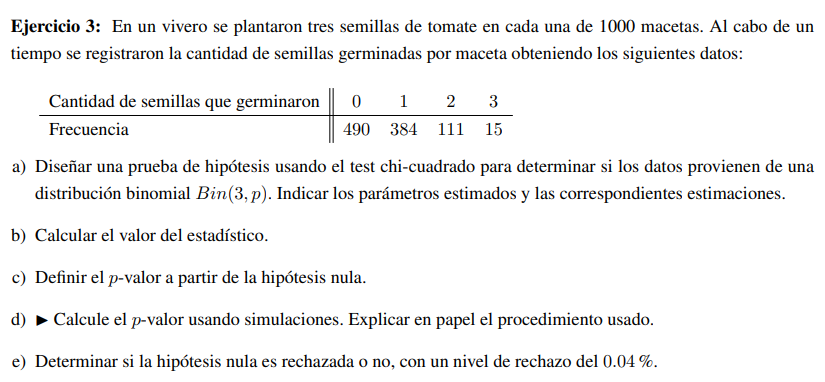

## a)

$$
H_0 = \text{los datos provienen de una distribución binomial Bin(n=3, p), con p desconocido}
$$

Para ello vamos a estimar el parametro $p$ con:

$$
p = \frac{∑_{i=1}^{1000} x_i}{1000} ⋅ \frac{1}{3}
$$

In [9]:
import math

VALORES_POSIBLES = [0, 1, 2, 3]
FRECUENCIAS_MUESTRA_EJ3 = [490, 384, 111, 15]
PARAMETRO_n = 3


muestra = []
for v, f in zip(VALORES_POSIBLES, FRECUENCIAS_MUESTRA_EJ3):
    muestra += [v]*f

# muestra = [v*f for v, f in zip(VALORES_POSIBLES, FRECUENCIAS_MUESTRA_EJ3)]

estimacion_p = (sum(muestra)/1_000) * (1/PARAMETRO_n)
print(f"Estimacion de p: {estimacion_p:.8f}")

Estimacion de p: 0.21700000


## b)

In [17]:
import math

def fpm_binomial(x, n, p):
    return math.comb(n, x) * p**x * (1 - p)**(n - x)

In [18]:
import numpy as np
from scipy.stats import chi2, binom


def estadistico_pearson(frecuencias, p_hip_0):
    """Se asume que frecuencias[i] corresponden con p_hip_0[i]."""
    assert len(frecuencias) == len(p_hip_0)

    n = sum(frecuencias)
    return sum((N-n*p)**2/(n*p) for N, p in zip(frecuencias, p_hip_0))


p_hip_0 = [fpm_binomial(k, PARAMETRO_n, estimacion_p) for k in range(PARAMETRO_n+1)]

t_0 = estadistico_pearson(FRECUENCIAS_MUESTRA_EJ3, p_hip_0)
print(f"t_0: {t_0}")

t_0: 3.0181185228436638


## c)

En este caso tenemos que dado $T$ el estadistico chi cuadrado de Pearson y $t_0$ el resultado de aplicar el estadistico a nuestra mestra definimos el $p-valor$ como:

$$
p-valor = P_{H_0}(T ≥ t_0)
$$

## d)

In [19]:
import numpy as np
from random import random


def gen_binomial(n, p):
    c = p / (1 - p)
    prob = (1 - p) ** n
    F = prob; i=0
    U = random()
    while U >= F:
        prob *= c * (n-i) / (i+1)
        F += prob
        i += 1
    return i


def ej3_p_valor(tam_muestra, t_0, bin_n, bin_p, n_sim=10_000):
    binomial = binom(bin_n, bin_p)

    p_valor = 0
    for _ in range(n_sim):
        # Generamos una muestra
        muestra = [gen_binomial(bin_n, bin_p) for _ in range(tam_muestra)]

        # Calculamos en base a la muestra p
        nueva_p_estimacion = np.mean(muestra) / bin_n

        # Calculamos los nuevos ps
        ps = [fpm_binomial(k, n=bin_n, p=nueva_p_estimacion) for k in range(bin_n+1)]

        # Contamos las frecuencias
        frecuencias = np.bincount(muestra, minlength=bin_n+1)

        # Calculamos el estadistico de pearson
        total = sum(frecuencias)
        T = sum((N-total*p)**2/(total*p) for N, p in zip(frecuencias, ps))

        if T >= t_0:
            p_valor += 1

    return p_valor / n_sim


ej3_p_valor(1000, t_0, PARAMETRO_n, estimacion_p)

0.2223

## e)

Dado que $0.2223 > 0.04$ no hay evidencia para rechazar la hipotesis nula.

# EJ 4

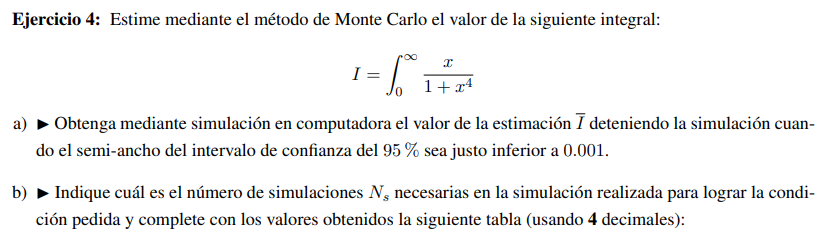

In [51]:
#@title Calculo simbolico de las intergrales
import sympy as sp

x = sp.symbols('x')

print("-"*50)
expr = x/(1+x**4)
res = sp.integrate(expr, (x, 0, sp.oo))
print("Resultado simbolico: ", res, f" = {res.evalf():.8f}")
print("-"*50)

from scipy.integrate import quad
import numpy as np

# Definir función integrando
def f(x):
    return x / (1 + x**4)

# Integrar de 0 a inf
res, _ = quad(f, 0, np.inf)

print("-"*50)
print(f"Resultado numérico: {res:.8f}")
print("-"*50)

--------------------------------------------------
Resultado simbolico:  pi/4  = 0.78539816
--------------------------------------------------
--------------------------------------------------
Resultado numérico: 0.78539816
--------------------------------------------------


In [27]:
from random import random
from numpy import sqrt


def estimacion_del_ej4a(sim, z_alfa_2, L):
    d = L / (2 * z_alfa_2)
    media = sim(random())               # Primer valor de X
    var_acumulada = 0.0                 # Varianza acumulada (S^2)
    n = 1                               # Contador de simulaciones

    while n <= 100 or sqrt(var_acumulada / n) > d:
        n += 1
        x = sim(random())

        media_anterior = media
        media += (x - media_anterior) / n

        # Actualización recursiva de la varianza muestral
        var_acumulada = var_acumulada * (1 - 1 / (n - 1)) + n * (media - media_anterior) ** 2

    intervalo = (media - z_alfa_2*sqrt(var_acumulada / n), media + z_alfa_2*sqrt(var_acumulada / n))
    return media, var_acumulada, intervalo, n


def estimacion_del_ej4b(sim, z_alfa_2, L, n):
    d = L / (2 * z_alfa_2)
    valores = [sim(random()) for _ in range(n)]
    media = sum(valores) / n
    var_acumulada = sum((x - media) ** 2 for x in valores) / (n-1)

    intervalo = (media - z_alfa_2*sqrt(var_acumulada / n), media + z_alfa_2*sqrt(var_acumulada / n))
    return media, var_acumulada, intervalo, n

In [31]:
from scipy.stats import norm


def print_result_ej4(sim, semi_ancho_I):
    confianza = 0.95
    alfa = 1-confianza
    z_alfa_2 = abs(norm.ppf(alfa/ 2))

    n_sim = [1000, 5000, 7000]

    resultados = [estimacion_del_ej4b(sim, z_alfa_2, semi_ancho_I, n) for n in n_sim]
    resultados.append(estimacion_del_ej4a(sim, z_alfa_2, semi_ancho_I*2))

    print("\n" + " Resultados de la simulación ".center(75, "-"))
    print(f"{'n_sim':>10} | {'Integral':>10} | {'Varianza':>10} | {'IC (95%)':^16} | {'Long. IC':>10}")
    print("-" * 75)

    # Filas
    for media, var, intervalo, n in resultados:
        long_ic = intervalo[1] - intervalo[0]
        print(f"{n:>10} | {media:10.4f} | {var:10.4f} | ({intervalo[0]:.4f}, {intervalo[1]:.4f}) | {long_ic:10.4f}")

    print("-" * 75)

In [39]:
def ej4i_f(x):
    return x/(1+x**4)


def ej4i_f_modificada(y):
    return ej4i_f((1/y)-1)/(y**2)

SEMI_ANCHO_I = 0.001

print_result_ej4(ej4i_f_modificada, SEMI_ANCHO_I)


----------------------- Resultados de la simulación -----------------------
     n_sim |   Integral |   Varianza |     IC (95%)     |   Long. IC
---------------------------------------------------------------------------
      1000 |     0.7695 |     0.4510 | (0.7278, 0.8111) |     0.0833
      5000 |     0.7992 |     0.4443 | (0.7807, 0.8177) |     0.0370
      7000 |     0.7966 |     0.4404 | (0.7810, 0.8121) |     0.0311
   1685325 |     0.7852 |     0.4387 | (0.7842, 0.7862) |     0.0020
---------------------------------------------------------------------------
